In [1]:
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

dataset = pd.read_csv("dataAudio.csv")
dataset

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,filename,chroma_frequency,sp_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc,label
0,boombap1.wav,0.453958,1958.596101,2242.096760,4128.825034,0.082547,7.353139,boombap
1,boombap10.wav,0.464496,2986.492353,2837.508148,6292.511950,0.147826,2.782494,boombap
2,boombap100.wav,0.459968,2377.117125,2708.232787,5411.317279,0.064741,8.356519,boombap
3,boombap1000.wav,0.493061,2218.901984,2303.409329,4625.305365,0.101993,4.666915,boombap
4,boombap1001.wav,0.502233,2215.360115,2261.072044,4563.039075,0.105489,4.909902,boombap
...,...,...,...,...,...,...,...,...
12193,trap995.wav,0.479732,2341.972464,2381.461711,4880.220490,0.098807,6.350958,trap
12194,trap996.wav,0.586347,2309.798019,2479.139534,4966.919966,0.068026,6.352512,trap
12195,trap997.wav,0.572542,2055.582032,2287.343790,4201.607927,0.059735,6.019572,trap
12196,trap998.wav,0.531964,2348.962830,2425.149789,4921.086910,0.083488,6.259667,trap


In [2]:
label = dataset.iloc[:,-1:].values
print(label)

features = dataset.iloc[:,1:-1]
print(features)

[['boombap']
 ['boombap']
 ['boombap']
 ...
 ['trap']
 ['trap']
 ['trap']]
       chroma_frequency  sp_centroid  spectral_bandwidth      rolloff  \
0              0.453958  1958.596101         2242.096760  4128.825034   
1              0.464496  2986.492353         2837.508148  6292.511950   
2              0.459968  2377.117125         2708.232787  5411.317279   
3              0.493061  2218.901984         2303.409329  4625.305365   
4              0.502233  2215.360115         2261.072044  4563.039075   
...                 ...          ...                 ...          ...   
12193          0.479732  2341.972464         2381.461711  4880.220490   
12194          0.586347  2309.798019         2479.139534  4966.919966   
12195          0.572542  2055.582032         2287.343790  4201.607927   
12196          0.531964  2348.962830         2425.149789  4921.086910   
12197          0.485520  2315.664751         2374.392025  4841.720723   

       zero_crossing_rate      mfcc  
0         

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.3, random_state =0)
print(x_test)

       chroma_frequency  sp_centroid  spectral_bandwidth      rolloff  \
5711           0.352739   763.870051         1265.752541  1319.608687   
5385           0.345159   717.773610         1073.960838  1287.292216   
992            0.395720  1817.129413         1773.583505  3757.193947   
154            0.453002  2095.687487         2177.960235  4502.522774   
9161           0.445160  2119.744922         2057.178898  4193.441310   
...                 ...          ...                 ...          ...   
9340           0.424434  3598.660268         3281.748994  7800.219500   
11082          0.490640  3115.073891         2793.919759  6460.710933   
1124           0.432184  1528.944162         2100.804865  3307.713332   
11208          0.418247  2152.265189         2345.530765  4582.088959   
5034           0.336113   593.199003          967.074691  1025.393800   

       zero_crossing_rate       mfcc  
5711             0.031685  -0.762679  
5385             0.036801  -0.366283  
992   

In [4]:
# input_dim = features, 
# units= yapay sinir hücresi, 
# init= yapay sinir hücresi içerisindeki ağırlıkları rastgele yerine belirli algoritmaya göre verir

In [5]:
model = Sequential()

# 1. Katman - Input
model.add(Dense(20,input_dim=6,kernel_initializer='uniform',activation='relu')) 

# 2. Katman 
model.add(Dense(12,kernel_initializer='uniform',activation='relu'))

# 3. Katman
model.add(Dense(8,kernel_initializer='uniform',activation='sigmoid'))

# 4. Katman - Output
model.add(Dense(1,kernel_initializer='uniform',activation='sigmoid')) 

# binary_crossentropy = Gerçek etiketler ve tahmin edilen etiketler arasındaki çapraz entropi kaybını hesaplar.
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
# 'Cast string to float is not supported' hatası
# https://www.youtube.com/watch?v=k_VAKyzggJI

In [7]:
lb = LabelEncoder()
y = lb.fit_transform(y_train)

C:\Users\Cengiz\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [8]:
# epochs = ağırlıkları yeniden düzenleyerek çözüme en yakın değeri buluncaya kadar yapılacak deneme sayısı
# batch_size = tek seferde alınacak veri sayısı
# verbose = hatanın gösterilmemesi
# validation_split = doğrulama için eğitim verilerinin bir kısmını otomatik olarak ayırmaya izin verir.

In [9]:
history = model.fit(x_train, y, validation_split=0.33,batch_size=100, epochs=200, verbose=2)

Epoch 1/200
58/58 - 1s - loss: 0.2390 - accuracy: 0.1904 - val_loss: -4.1340e-02 - val_accuracy: 0.1980 - 571ms/epoch - 10ms/step
Epoch 2/200
58/58 - 0s - loss: -2.9237e-01 - accuracy: 0.1900 - val_loss: -5.0401e-01 - val_accuracy: 0.1980 - 88ms/epoch - 2ms/step
Epoch 3/200
58/58 - 0s - loss: -7.4123e-01 - accuracy: 0.1900 - val_loss: -9.2406e-01 - val_accuracy: 0.1980 - 88ms/epoch - 2ms/step
Epoch 4/200
58/58 - 0s - loss: -1.1551e+00 - accuracy: 0.1900 - val_loss: -1.3135e+00 - val_accuracy: 0.1980 - 81ms/epoch - 1ms/step
Epoch 5/200
58/58 - 0s - loss: -1.5420e+00 - accuracy: 0.1900 - val_loss: -1.6795e+00 - val_accuracy: 0.1980 - 84ms/epoch - 1ms/step
Epoch 6/200
58/58 - 0s - loss: -1.9100e+00 - accuracy: 0.1900 - val_loss: -2.0281e+00 - val_accuracy: 0.1980 - 92ms/epoch - 2ms/step
Epoch 7/200
58/58 - 0s - loss: -2.2633e+00 - accuracy: 0.1900 - val_loss: -2.3667e+00 - val_accuracy: 0.1980 - 86ms/epoch - 1ms/step
Epoch 8/200
58/58 - 0s - loss: -2.6054e+00 - accuracy: 0.1900 - val_loss

Epoch 63/200
58/58 - 0s - loss: -2.1462e+01 - accuracy: 0.1900 - val_loss: -2.1009e+01 - val_accuracy: 0.1980 - 80ms/epoch - 1ms/step
Epoch 64/200
58/58 - 0s - loss: -2.1815e+01 - accuracy: 0.1900 - val_loss: -2.1350e+01 - val_accuracy: 0.1980 - 83ms/epoch - 1ms/step
Epoch 65/200
58/58 - 0s - loss: -2.2168e+01 - accuracy: 0.1900 - val_loss: -2.1689e+01 - val_accuracy: 0.1980 - 86ms/epoch - 1ms/step
Epoch 66/200
58/58 - 0s - loss: -2.2520e+01 - accuracy: 0.1900 - val_loss: -2.2036e+01 - val_accuracy: 0.1980 - 84ms/epoch - 1ms/step
Epoch 67/200
58/58 - 0s - loss: -2.2874e+01 - accuracy: 0.1900 - val_loss: -2.2379e+01 - val_accuracy: 0.1980 - 83ms/epoch - 1ms/step
Epoch 68/200
58/58 - 0s - loss: -2.3228e+01 - accuracy: 0.1900 - val_loss: -2.2722e+01 - val_accuracy: 0.1980 - 82ms/epoch - 1ms/step
Epoch 69/200
58/58 - 0s - loss: -2.3582e+01 - accuracy: 0.1900 - val_loss: -2.3066e+01 - val_accuracy: 0.1980 - 92ms/epoch - 2ms/step
Epoch 70/200
58/58 - 0s - loss: -2.3934e+01 - accuracy: 0.1900

Epoch 124/200
58/58 - 0s - loss: -4.2991e+01 - accuracy: 0.1900 - val_loss: -4.1901e+01 - val_accuracy: 0.1980 - 82ms/epoch - 1ms/step
Epoch 125/200
58/58 - 0s - loss: -4.3345e+01 - accuracy: 0.1900 - val_loss: -4.2247e+01 - val_accuracy: 0.1980 - 84ms/epoch - 1ms/step
Epoch 126/200
58/58 - 0s - loss: -4.3699e+01 - accuracy: 0.1900 - val_loss: -4.2591e+01 - val_accuracy: 0.1980 - 85ms/epoch - 1ms/step
Epoch 127/200
58/58 - 0s - loss: -4.4052e+01 - accuracy: 0.1900 - val_loss: -4.2935e+01 - val_accuracy: 0.1980 - 84ms/epoch - 1ms/step
Epoch 128/200
58/58 - 0s - loss: -4.4405e+01 - accuracy: 0.1900 - val_loss: -4.3276e+01 - val_accuracy: 0.1980 - 87ms/epoch - 2ms/step
Epoch 129/200
58/58 - 0s - loss: -4.4756e+01 - accuracy: 0.1900 - val_loss: -4.3618e+01 - val_accuracy: 0.1980 - 82ms/epoch - 1ms/step
Epoch 130/200
58/58 - 0s - loss: -4.5109e+01 - accuracy: 0.1900 - val_loss: -4.3959e+01 - val_accuracy: 0.1980 - 82ms/epoch - 1ms/step
Epoch 131/200
58/58 - 0s - loss: -4.5464e+01 - accuracy

Epoch 185/200
58/58 - 0s - loss: -6.4518e+01 - accuracy: 0.1900 - val_loss: -6.2797e+01 - val_accuracy: 0.1980 - 88ms/epoch - 2ms/step
Epoch 186/200
58/58 - 0s - loss: -6.4870e+01 - accuracy: 0.1900 - val_loss: -6.3140e+01 - val_accuracy: 0.1980 - 85ms/epoch - 1ms/step
Epoch 187/200
58/58 - 0s - loss: -6.5223e+01 - accuracy: 0.1900 - val_loss: -6.3485e+01 - val_accuracy: 0.1980 - 81ms/epoch - 1ms/step
Epoch 188/200
58/58 - 0s - loss: -6.5577e+01 - accuracy: 0.1900 - val_loss: -6.3829e+01 - val_accuracy: 0.1980 - 94ms/epoch - 2ms/step
Epoch 189/200
58/58 - 0s - loss: -6.5932e+01 - accuracy: 0.1900 - val_loss: -6.4168e+01 - val_accuracy: 0.1980 - 90ms/epoch - 2ms/step
Epoch 190/200
58/58 - 0s - loss: -6.6283e+01 - accuracy: 0.1900 - val_loss: -6.4513e+01 - val_accuracy: 0.1980 - 87ms/epoch - 2ms/step
Epoch 191/200
58/58 - 0s - loss: -6.6636e+01 - accuracy: 0.1900 - val_loss: -6.4856e+01 - val_accuracy: 0.1980 - 85ms/epoch - 1ms/step
Epoch 192/200
58/58 - 0s - loss: -6.6988e+01 - accuracy

In [10]:
test_loss, test_acc = model.evaluate(x_train,y)
print("The test loss is: ", test_loss)
print("The best accuracy is: %", test_acc*100)

267/267 [==============================] - 0s 817us/step - loss: -69.3178 - accuracy: 0.1927
The test loss is:  -69.31781005859375
The best accuracy is: % 19.266806542873383


In [31]:
# geçmişteki tüm verileri listele
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


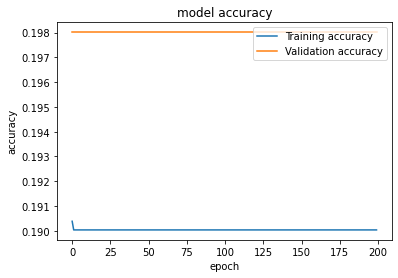

In [32]:
# accuracy geçmişi
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training accuracy', 'Validation accuracy'], loc='upper right')
plt.show()

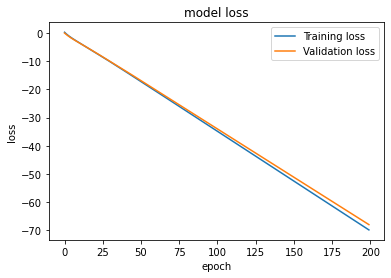

In [33]:
# loss geçmişi
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training loss', 'Validation loss'], loc='upper right')
plt.show()